<a href="https://colab.research.google.com/github/p1kalys/Titanic-Survival-prediction/blob/main/Titanic_Survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/p1kalys/Titanic-Survival-prediction/main/Titanic-data.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [34]:
df.shape

(418, 12)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [36]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [37]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [38]:
df['Age'] = df['Age'].fillna(value = 30)
df['Age'].isnull().sum()

0

In [39]:
df = df.astype({'Age':int})
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [40]:
df['Fare'] = df['Fare'].fillna(value = 35)
df['Fare'].isnull().sum()

0

In [41]:
df = df.astype({'Fare':int})
df.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age             int64
SibSp           int64
Parch           int64
Ticket         object
Fare            int64
Cabin          object
Embarked       object
dtype: object

In [42]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Sex'].value_counts()

1    266
0    152
Name: Sex, dtype: int64

In [43]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34,0,0,330911,7,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47,1,0,363272,7,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62,0,0,240276,9,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27,0,0,315154,8,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22,1,1,3101298,12,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,30,0,0,A.5. 3236,8,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39,0,0,PC 17758,108,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38,0,0,SOTON/O.Q. 3101262,7,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",1,30,0,0,359309,8,NaN,S


In [44]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34,0,0,330911,7,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47,1,0,363272,7,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62,0,0,240276,9,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27,0,0,315154,8,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22,1,1,3101298,12,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,30,0,0,A.5. 3236,8,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39,0,0,PC 17758,108,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38,0,0,SOTON/O.Q. 3101262,7,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",1,30,0,0,359309,8,NaN,S


In [45]:
df['Age'].values

array([34, 47, 62, 27, 22, 14, 30, 26, 18, 21, 30, 46, 23, 63, 47, 24, 35,
       21, 27, 45, 55,  9, 30, 21, 48, 50, 22, 22, 41, 30, 50, 24, 33, 30,
       30, 18, 30, 21, 25, 30, 39, 30, 41, 30, 45, 25, 45, 30, 60, 36, 24,
       27, 20, 28, 30, 10, 35, 25, 30, 36, 17, 32, 18, 22, 13, 30, 18, 47,
       31, 60, 24, 21, 29, 28, 35, 32, 30, 55, 30, 24,  6, 67, 49, 30, 30,
       30, 27, 18, 30,  2, 22, 30, 27, 30, 25, 25, 76, 29, 20, 33, 43, 27,
       30, 26, 16, 28, 21, 30, 30, 18, 41, 30, 36, 18, 63, 18, 30,  1, 36,
       29, 12, 30, 35, 28, 30, 17, 22, 30, 42, 24, 32, 53, 30, 30, 43, 24,
       26, 26, 23, 40, 10, 33, 61, 28, 42, 31, 30, 22, 30, 30, 23, 30, 60,
       36, 13, 24, 29, 23, 42, 26, 30,  7, 26, 30, 41, 26, 48, 18, 30, 22,
       30, 27, 23, 30, 40, 15, 20, 54, 36, 64, 30, 37, 18, 30, 27, 40, 21,
       17, 30, 40, 34, 30, 11, 61,  8, 33,  6, 18, 23, 30, 30,  0, 47,  8,
       25, 30, 35, 24, 33, 25, 32, 30, 17, 60, 38, 42, 30, 57, 50, 30, 30,
       21, 22, 21, 53, 30

In [46]:
df['Fare'].values

array([  7,   7,   9,   8,  12,   9,   7,  29,   7,  24,   7,  26,  82,
        26,  61,  27,  12,   7,   7,   7,  59,   3,  31,  61, 262,  14,
        61,   7,  30,  21,  26,  31,  20,  23,  57,   7,   8,   8,   9,
        56,  13,  26,   7,  13,  52,   7,  29,   7,  76,  15,  60,  15,
        23, 263,  15,  29,   7,   7,  16, 262,   7,  13,   7,   7, 262,
        21,   7,  42,  28, 263,   7,   7,   7,  27, 211, 211,   8,  25,
        13,   7,  15, 221,  26,   7,  10,  14,   7,   8,   7,  23,  13,
         7,  52,   8,  26,   7,  78,   7,   7,   8,  55,  26,   7,   7,
         8,  22,   7,   7,   8,  13,  15,   7,  31,   7, 221,  14,   6,
        16,  75,  26,  15,   7,  57,   7,   7,  16,   7,  23,  13,   8,
         8,  28,  25,   6,   7,   7,   7,  13,   8,  46,  46, 151, 262,
        26,  26,  18,  51,   8,  26,  26,  83,   7,  35,  12,  31,   7,
       221,   7,  26,  13,   7,  15,  13,   7,  13,  22,  50,  34,  27,
         8,   7,   7,  13,   7,  31,  39,  36,  55,  39,  83,  1

In [47]:
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['Embarked'].value_counts()

2    270
0    102
1     46
Name: Embarked, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


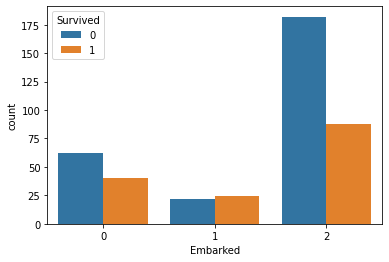

In [48]:
import seaborn as sns
sns.countplot(df['Embarked'],hue=df['Survived'])
plt.show()

In [49]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.023245,-0.026751,0.023245,-0.030648,0.003818,0.043080,0.008340,0.040699
Survived,-0.023245,1.000000,-0.108615,-1.000000,0.001538,0.099943,0.159120,0.191156,-0.076281
Pclass,-0.026751,-0.108615,1.000000,0.108615,-0.443531,0.001087,0.018721,-0.577438,0.227983
Sex,0.023245,-1.000000,0.108615,1.000000,-0.001538,-0.099943,-0.159120,-0.191156,0.076281
Age,-0.030648,0.001538,-0.443531,-0.001538,1.000000,-0.079203,-0.045259,0.328407,-0.157054
SibSp,0.003818,0.099943,0.001087,-0.099943,-0.079203,1.000000,0.306895,0.171884,0.052708
Parch,0.043080,0.159120,0.018721,-0.159120,-0.045259,0.306895,1.000000,0.230308,0.054577
Fare,0.008340,0.191156,-0.577438,-0.191156,0.328407,0.171884,0.230308,1.000000,-0.256538
Embarked,0.040699,-0.076281,0.227983,0.076281,-0.157054,0.052708,0.054577,-0.256538,1.000000


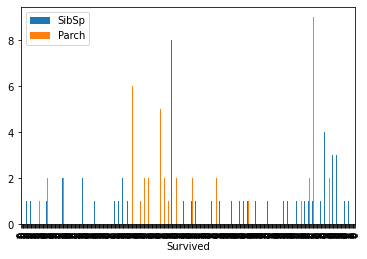

In [50]:
df.plot(x='Survived',y=['SibSp','Parch'], kind='bar')
plt.show()

In [51]:
correlation = df.corr()
correlation['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.191156
Parch          0.159120
SibSp          0.099943
Age            0.001538
PassengerId   -0.023245
Embarked      -0.076281
Pclass        -0.108615
Sex           -1.000000
Name: Survived, dtype: float64

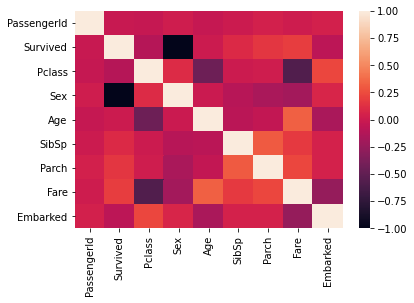

In [52]:
sns.heatmap(df.corr())

In [53]:
df['family'] = df['SibSp']+df['Parch']+1
df = df.drop(['SibSp','Parch'],axis=1)
df = df.drop('PassengerId',axis=1)
df = df.drop('Embarked',axis=1)
df = df.drop('Name',axis=1)
df = df.drop('Cabin',axis=1)
df = df.drop('Ticket',axis=1)
df 

,Survived,Pclass,Sex,Age,Fare,family
0,0,3,1,34,7,1
1,1,3,0,47,7,2
2,0,2,1,62,9,1
3,0,3,1,27,8,1
4,1,3,0,22,12,3
...,...,...,...,...,...,...
413,0,3,1,30,8,1
414,1,1,0,39,108,1
415,0,3,1,38,7,1
416,0,3,1,30,8,1


In [54]:
df.dtypes

Survived    int64
Pclass      int64
Sex         int64
Age         int64
Fare        int64
family      int64
dtype: object

In [55]:
x = df.drop('Survived',axis=1).values
y = df['Survived'].values

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0])

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)

1.0

In [59]:
confusion_matrix(y_pred,y_test)

array([[92,  0],
       [ 0, 46]])

In [60]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        46

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138

